# Group Problem (35pt)

In this homework you will implement k-means for image segmentation.

**Step 1.** Take **three** photos. Do not use very large photos. You may use the PNG and JPEG
format. For each photo,

* Load your photo into computer and get the pixels each of which is given by (R,G,B).
Use the libraries for processing image.

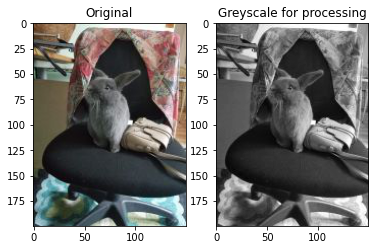

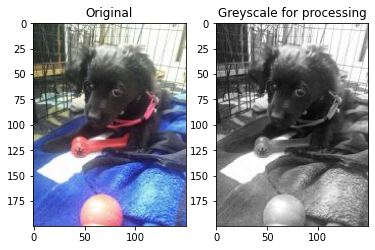

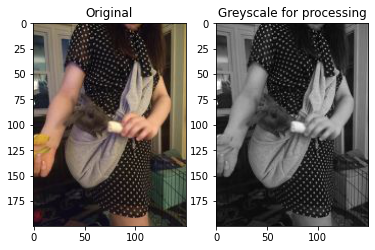

In [21]:
import math
from copy import deepcopy

import cv2 as cv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import random
import matplotlib.pyplot as plt

my_paths = ["images_original/20210420_185512.jpg",
            "images_original/IMG_20210516_101659172.jpg",
            "images_original/IMG_20210521_204633847.jpg"]


# img0 = cv.imread("images_original/20210420_185512.jpg")
# img1 = cv.imread("images_original/IMG_20210516_101659172.jpg")
# img2 = cv.imread("images_original/IMG_20210521_204633847.jpg")

def grayscale(colors):
    """Return grayscale of given color."""
    r, g, b = colors
    return 0.07 * r + 0.72 * g + 0.21 * b


# image = np.random.uniform(255, size=(10,10,3))
# result = np.apply_along_axis(grayscale, 2, image)

# images = [img0, img1, img2]
def load_images(paths):
    images = []
    for path in paths:
        image = Image.open(path)
        image = np.array(image)
        greyscale = np.apply_along_axis(grayscale, 2, image)
        images.append(greyscale)

        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(image)
        ax[0].set_title("Original")
        ax[1].imshow(greyscale, cmap='gray')
        ax[1].set_title("Greyscale for processing")
        plt.show()

    return images


my_images = load_images(my_paths)
# red, green, blue = img.split()
# fig, ax = plt.subplots(1, 3)
# ax[0].imshow(red)
# ax[0].set_title('Red')
# ax[1].imshow(green)
# ax[1].set_title('Green')
# ax[2].imshow(blue)
# ax[2].set_title('Blue')
# plt.show()


* Apply K-means to the pixels, and rewrite the image where each pixel is replaced by
the mean of its cluster. Now you have a new photo.

0/5
1/5
2/5
3/5
4/5
cluster at (4, 0) mean:130.02305673742876
0/5
1/5
2/5
3/5
4/5
cluster at (7, 1) mean:157.85061580654792
cluster at (8, 5) mean:126.87852727505265
0/5
1/5
2/5
3/5
4/5
cluster at (7, 1) mean:155.80402465303376
cluster at (4, 8) mean:198.67505980848645
cluster at (7, 5) mean:50.02431100780176
cluster at (6, 7) mean:117.32064477770638
cluster at (3, 4) mean:89.05311366385561
0/5
1/5
2/5
3/5
4/5
cluster at (6, 5) mean:93.56556913291209
cluster at (5, 0) mean:182.25157361315968
cluster at (6, 1) mean:61.9329365835479
cluster at (1, 3) mean:44.97455982509852
cluster at (8, 3) mean:159.6577306804163
cluster at (2, 0) mean:83.57318808312894
cluster at (4, 2) mean:216.01745676466246
cluster at (6, 8) mean:146.78586575091754
cluster at (9, 1) mean:199.60452162103167
cluster at (6, 7) mean:118.16421126115871
0/5
1/5
2/5
3/5
4/5
cluster at (3, 7) mean:135.82797521355656
cluster at (5, 4) mean:163.2460276564215
cluster at (9, 5) mean:178.57039485542347
cluster at (2, 2) mean:97.2

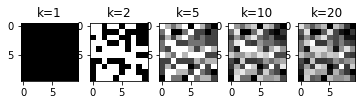

In [22]:
import math

tolerance = .0001
iterations = 5


def closest(lst, K):
    lst = np.asarray(lst)
    idx = (np.abs(lst - K)).argmin()
    return lst[idx]


def k_means(input_image, cluster_count):
    image = deepcopy(input_image)
    img_x, img_y = image.shape
    # print(img_x)
    # print(img_y)
    x_points = ([])
    y_points = ([])
    clusters = {}

    for k in range(0, cluster_count):
        random_x = random.randint(0, img_x - 1)
        random_y = random.randint(0, img_y - 1)
        x_points.append(random_x)
        y_points.append(random_y)
        point = (random_x, random_y)
        clusters[point] = []

    # print(clusters)
    # print(x_points)
    # print(y_points)
    # plt.imshow(image, cmap='gray')
    # plt.plot()
    # plt.plot(y_points, x_points, 's', c='red')
    # plt.title("Centroids")
    # plt.show()

    for i in range(0, iterations):
        print(str(cluster_count) + " Clusters " + str(i) + "/" + str(iterations))
        # plt.imshow(image, cmap='gray')
        # plt.plot(y_points, x_points, 's', c='red')
        # plt.title("Centroids")
        for x in range(img_x):
            for y in range(img_y):
                pixel_value = image[x, y]
                distances = {}
                for cluster in clusters:
                    cluster_value = image[cluster[0], cluster[1]]
                    distance = np.linalg.norm(pixel_value - cluster_value)
                    distances[cluster] = distance
                closest_cluster = min(distances, key=distances.get)
                clusters[closest_cluster].append([x, y])

        # for center in clusters:
        #     color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        #     for point in clusters[center]:
        #         plt.plot(point[1], point[0], 's', c=color)

        new_clusters = {}
        for center in clusters:
            values = []
            for point in clusters[center]:
                point_value = image[point[0], point[1]]
                values.append(point_value)
                # print(point_value)
            mean_value = np.mean(values)
            # print("mean:" + str(mean_value))
            mean_point = center
            mean_point_diff = math.inf
            for point in clusters[center]:
                point_value = image[point[0], point[1]]
                diff = abs(mean_value - point_value)
                # print(diff)
                if diff <= mean_point_diff:
                    mean_point = point
                    mean_point_diff = diff

            # print(mean_point)
            # print(mean_point_diff)

            # x_pts = ([center[0], int(mean[0])])
            # y_pts = ([center[1], int(mean[1])])
            # mean_pt = (int(mean[0]), int(mean[1]))
            # plt.plot(mean_point[1], mean_point[0], c='red')
            mean_key = (mean_point[0], mean_point[1])
            new_clusters[mean_key] = clusters[center]
        # plt.imshow(image, cmap='gray')
        # plt.title(str(cluster_count) + " Clusters " + str(i) + "/" + str(iterations))
        # plt.show()
        clusters = new_clusters

    for center in clusters:
        values = []
        for point in clusters[center]:
            point_value = image[point[0], point[1]]
            values.append(point_value)
            # print(point_value)
        mean_value = np.mean(values)
        print("cluster at " + str(center) + " mean:" + str(mean_value))
        for point in clusters[center]:
            image[point[0], point[1]] = mean_value
    # plt.imshow(image, cmap='gray')
    # plt.title("Segmented, k=" + str(cluster_count))
    # plt.show()
    return image


test_image = np.random.uniform(255, size=(10, 10, 3))
result = np.apply_along_axis(grayscale, 2, test_image)
# k_means(result, 2)
k_to_try = [1, 2, 5, 10, 20]
fig, ax = plt.subplots(1, len(k_to_try))
for i in range(len(k_to_try)):
    ax[i].imshow(k_means(result, k_to_try[i]), cmap='gray')
    ax[i].set_title("k=" + str(k_to_try[i]))
plt.show()


* Try different k from {1, 2, 5, 10, 20}. Now you have many new photos.

0/5
1/5
2/5
3/5
4/5
cluster at (11, 86) mean:93.01999233333333
0/5
1/5
2/5
3/5
4/5
cluster at (185, 3) mean:124.57551870829487
cluster at (191, 50) mean:96.35624198219254
0/5
1/5
2/5
3/5
4/5
cluster at (168, 137) mean:46.059833639957716
cluster at (173, 63) mean:23.8329903384436
cluster at (38, 144) mean:181.53551062897216
cluster at (100, 134) mean:71.57620227371916
cluster at (183, 12) mean:118.31269236171545
0/5
1/5
2/5
3/5
4/5
cluster at (159, 70) mean:26.964719858891886
cluster at (152, 22) mean:62.08180529111133
cluster at (186, 57) mean:48.98866106120192
cluster at (4, 80) mean:246.13703509919338
cluster at (91, 104) mean:17.292536636280854
cluster at (196, 63) mean:173.9749286868545
cluster at (62, 138) mean:207.41630036610334
cluster at (165, 125) mean:35.97725210646244
cluster at (179, 62) mean:132.75313531283237
cluster at (121, 102) mean:89.4595203252981
0/5
1/5
2/5
3/5
4/5
cluster at (33, 106) mean:76.59892116182571
cluster at (134, 136) mean:49.87777178355403
cluster at (

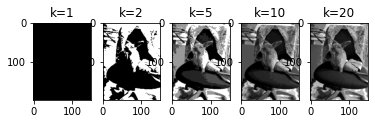

0/5
1/5
2/5
3/5
4/5
cluster at (116, 130) mean:125.37177133333333
0/5
1/5
2/5
3/5
4/5
cluster at (193, 72) mean:186.77747797212473
cluster at (88, 36) mean:78.68599358241052
0/5
1/5
2/5
3/5
4/5
cluster at (111, 98) mean:33.505484460694696
cluster at (195, 112) mean:84.58604347971057
cluster at (175, 37) mean:137.35191064748753
cluster at (169, 118) mean:222.78813944319086
cluster at (116, 37) mean:57.751888094948214
0/5
1/5
2/5
3/5
4/5
cluster at (51, 129) mean:239.50826680672267
cluster at (157, 130) mean:198.53079576565065
cluster at (184, 72) mean:217.40924845662695
cluster at (199, 77) mean:126.55223261900868
cluster at (45, 125) mean:246.09266299970466
cluster at (166, 143) mean:180.15380248460957
cluster at (95, 19) mean:151.21431726729026
cluster at (127, 128) mean:45.37429697096803
cluster at (150, 29) mean:253.04692534988428
cluster at (79, 68) mean:82.9979609435942
0/5
1/5
2/5
3/5
4/5
cluster at (160, 147) mean:134.28424766611752
cluster at (80, 52) mean:121.87236226908615
cl

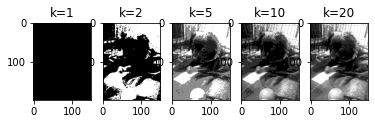

0/5
1/5
2/5
3/5
4/5
cluster at (158, 46) mean:74.57677133333333
0/5
1/5
2/5
3/5
4/5
cluster at (198, 32) mean:34.9419469671105
cluster at (64, 120) mean:125.07338544278178
0/5
1/5
2/5
3/5
4/5
cluster at (197, 70) mean:12.846016597510372
cluster at (168, 42) mean:58.689124789033166
cluster at (46, 44) mean:158.8733468191964
cluster at (184, 13) mean:27.901134774661145
cluster at (146, 74) mean:114.5709479032966
0/5
1/5
2/5
3/5
4/5
cluster at (100, 104) mean:160.32080014956065
cluster at (167, 148) mean:84.02178973942837
cluster at (87, 126) mean:180.54289485895427
cluster at (149, 42) mean:115.6563598388781
cluster at (194, 108) mean:129.39391755062002
cluster at (177, 61) mean:14.641762750716333
cluster at (189, 50) mean:27.98798376844745
cluster at (58, 47) mean:100.38403144460958
cluster at (139, 15) mean:143.49628720978646
cluster at (175, 122) mean:56.579757555932275
0/5
1/5
2/5
3/5
4/5
cluster at (89, 99) mean:160.38416933546839
cluster at (193, 87) mean:89.64528118040089
cluster 

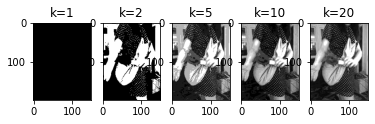

In [23]:
for my_img in my_images:
    fig, ax = plt.subplots(1, len(k_to_try))
    for i in range(len(k_to_try)):
        ax[i].imshow(k_means(my_img, k_to_try[i]), cmap='gray')
        ax[i].set_title("k=" + str(k_to_try[i]))
    plt.show()


* **Step 2.** Questions:
    * What did you find concerning the relationship between k and the size of the new image?

k=1 is basically worthless. Generally, more k tends to mean a sharper image.

    * For each of your photos, which k is the best you think? Why?
* Step 3. Take a new photo of which you believe k=2 is the best, and verify it use your program in step 1.

### What to Turn in
Please upload.
* Your **code and a Readme file** for compiling the code.
* Your original **photos** and produced photos.
* A pdf **report** of (a) your results in step 1, (b) your answers to step 2, and (c) your findings
in step 3. You should also show your photos in your report.